# Analysing network vulnerability
cite: Morelli, A. B., & Cunha, A. L. (2021). Assessing vulnerabilities in transport networks: a graph-theoretic approach. TRANSPORTES, 29(1), 161–172.
https://doi.org/10.14295/transportes.v29i1.2250

In [1]:
import osmnx as ox
import networkx as nx
import numpy as np
from tools import network_vulnerability as vnb, fast_ops as ops

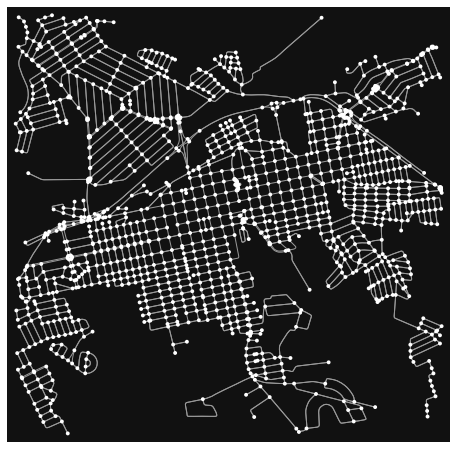

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [2]:
#Get sample graph
G = ox.graph_from_address('Monte Alto, SP, Brazil',dist=2000)
ox.plot_graph(G)

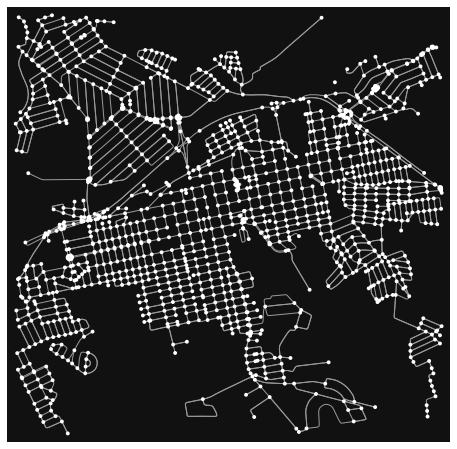

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
# we will remove 15% of the edges randomly and check
# the impact it has on continuity 
G2 = vnb.remove_edges_random(G,0.15,random_seed=42)
ox.plot_graph(G2)

In [4]:
# check number of valid paths per node on both situations
cont_initial = vnb.get_number_of_valid_paths(G)
cont_final = vnb.get_number_of_valid_paths(G2)
list(cont_initial.items())[:3], list(cont_final.items())[:3]

([(1808954775, 1337), (1808954777, 1337), (1808954781, 1337)],
 [(1808954775, 1269), (1808954777, 1269), (1808954781, 1272)])

In [5]:
# the reduction in continuity with this impact is:
G = vnb.get_continuity(G,G2,on_graph=True)

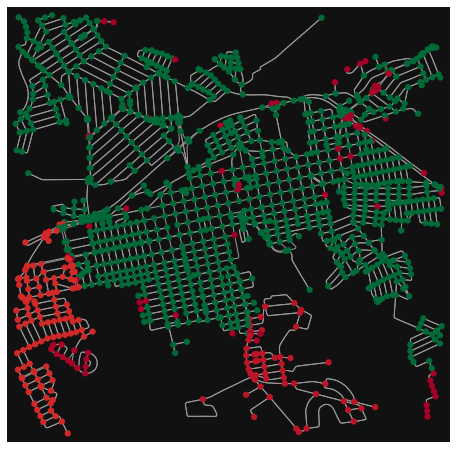

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [10]:
# now we can see the regions most affected
colors = ox.plot.get_node_colors_by_attr(G,'continuity',cmap='RdYlGn')
ox.plot_graph(G,node_color=colors,node_size=40)

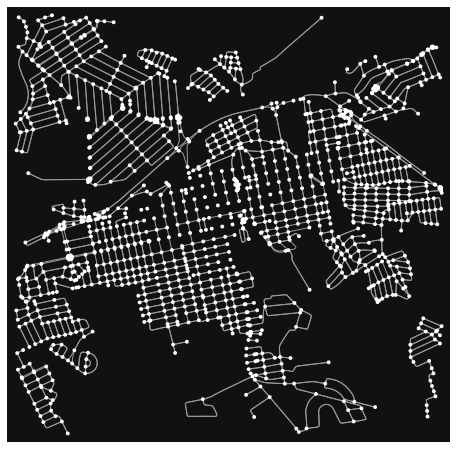

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [9]:
# remove edges in descending order of betweenness
# this allows for faster continuity decay
bet = ops.fast_betweenness(G,weight='length')
nx.set_edge_attributes(G,bet,'betweenness')
G2 = vnb.remove_edges_by_attr(G,'betweenness',.15)
ox.plot_graph(G2)

In [11]:
# the reduction in continuity with this impact is:
G = vnb.get_continuity(G,G2,on_graph=True)

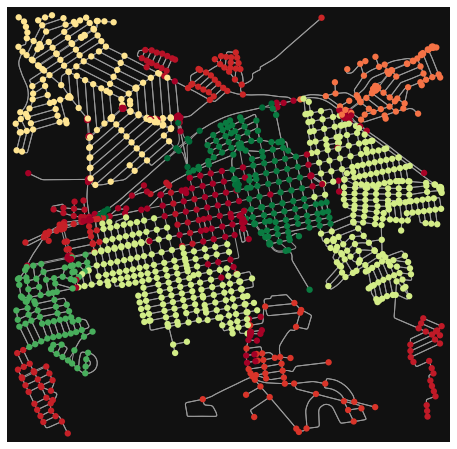

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [12]:
# now we can see the regions most affected
colors = ox.plot.get_node_colors_by_attr(G,'continuity',cmap='RdYlGn')
ox.plot_graph(G,node_color=colors,node_size=40)